In [8]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import PIL, sys
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
# 데이터 위치
base_dir = '/Users/DE/project4/CATEGORY_PIC'

# 데이터 전처리
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   validation_split=0.2) # 80% 학습, 20% 검증 데이터

# 이미지를 불러오는 generator 생성
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# 모델 구축
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# 모델 훈련
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=validation_generator, epochs=5)



Found 3256 images belonging to 7 classes.
Found 811 images belonging to 7 classes.


Epoch 1/5
102/102 [==============================] - 5012s 49s/step - loss: 2.9331 - accuracy: 0.4337 - val_loss: 3.8442 - val_accuracy: 0.1455
Epoch 2/5
102/102 [==============================] - 4796s 47s/step - loss: 0.2932 - accuracy: 0.9023 - val_loss: 2.3860 - val_accuracy: 0.1208
Epoch 3/5
102/102 [==============================] - 5470s 54s/step - loss: 0.0374 - accuracy: 0.9905 - val_loss: 2.6202 - val_accuracy: 0.1344
Epoch 4/5
102/102 [==============================] - 4883s 48s/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 2.4532 - val_accuracy: 0.1134
Epoch 5/5
102/102 [==============================] - 4748s 47s/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 2.5021 - val_accuracy: 0.1443


26/26 [==============================] - 32s 1s/step


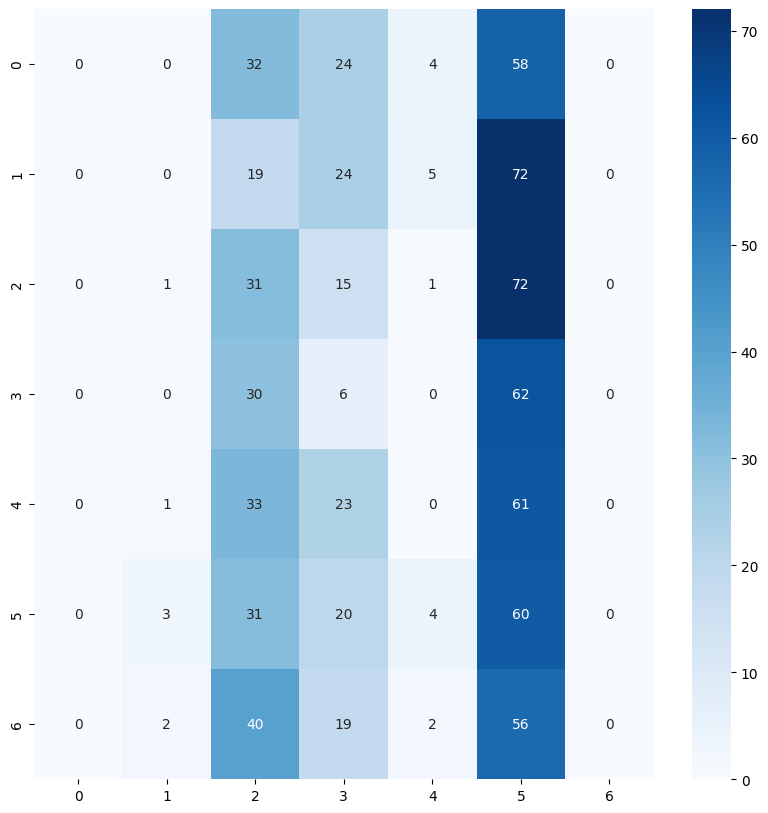

/Users/edward/anaconda3/envs/s1n1/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 검증 데이터셋을 이용해 모델이 예측한 결과를 가져옵니다.
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# 실제 라벨을 가져옵니다.
y_true = validation_generator.classes

# confusion matrix를 계산하고, 이를 heatmap으로 표시합니다.
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# 모델 저장
model.save('my_model.h5')  # .h5 확장자는 HDF5 포맷을 나타냅니다.

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 4096)              411045888 
                                                                 
 dense_3 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_4 (Dense)             (None, 7)                 28679     
                                                                 
Total params: 451443591 (1.68 GB)
Trainable params: 451390471 (1.68 GB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________
